In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv("house_prices.csv")

In [6]:
print(dataset.head(5))

           id             date         price  bedrooms  bathrooms  \
0  7129300520  20141013T000000  $221,900.00          3       1.00   
1  6414100192  20141209T000000  $538,000.00          3       2.25   
2  5631500400  20150225T000000  $180,000.00          2       1.00   
3  2487200875  20141209T000000  $604,000.00          4       3.00   
4  1954400510  20150218T000000  $510,000.00          3       2.00   

   sqft_living  sqft_lot  floors waterfront  view  ... grade  sqft_above  \
0         1180      5650     1.0          N     0  ...     7        1180   
1         2570      7242     2.0          N     0  ...     7        2170   
2          770     10000     1.0          N     0  ...     6         770   
3         1960      5000     1.0          N     0  ...     7        1050   
4         1680      8080     1.0          N     0  ...     8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.511

In [7]:
dataset.shape

(21613, 21)

In [ ]:
#Data processing

In [8]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

f1 = (dataset.dtypes == 'float')
f1_cols = list(f1[f1].index)
print("Float variables:",len(f1_cols))



Categorical variables: 4
Integer variables: 0
Float variables: 4


In [17]:
#Exploratory Data Analysis
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: >

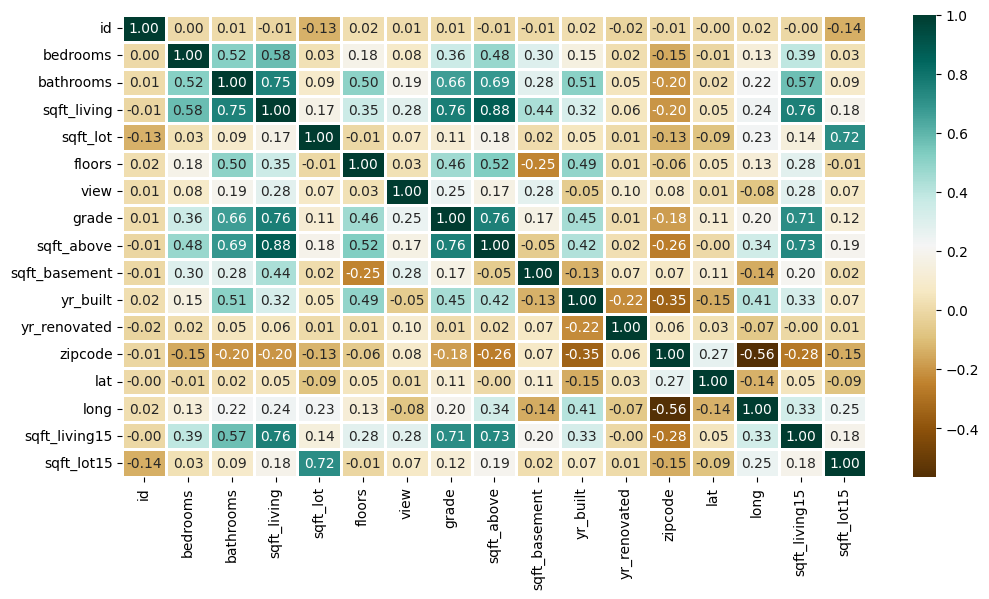

In [9]:
numerical_dataset = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
linewidths = 2,
annot = True)

In [ ]:
#Barplot

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

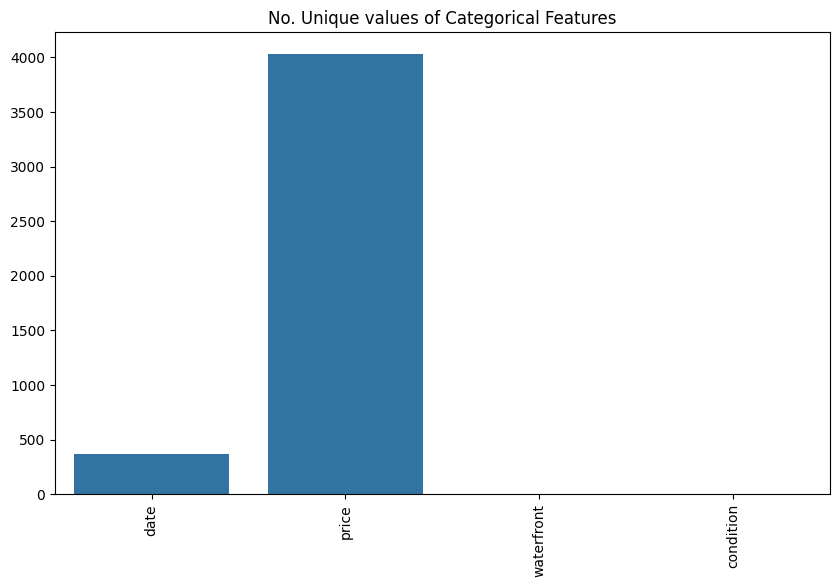

In [10]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

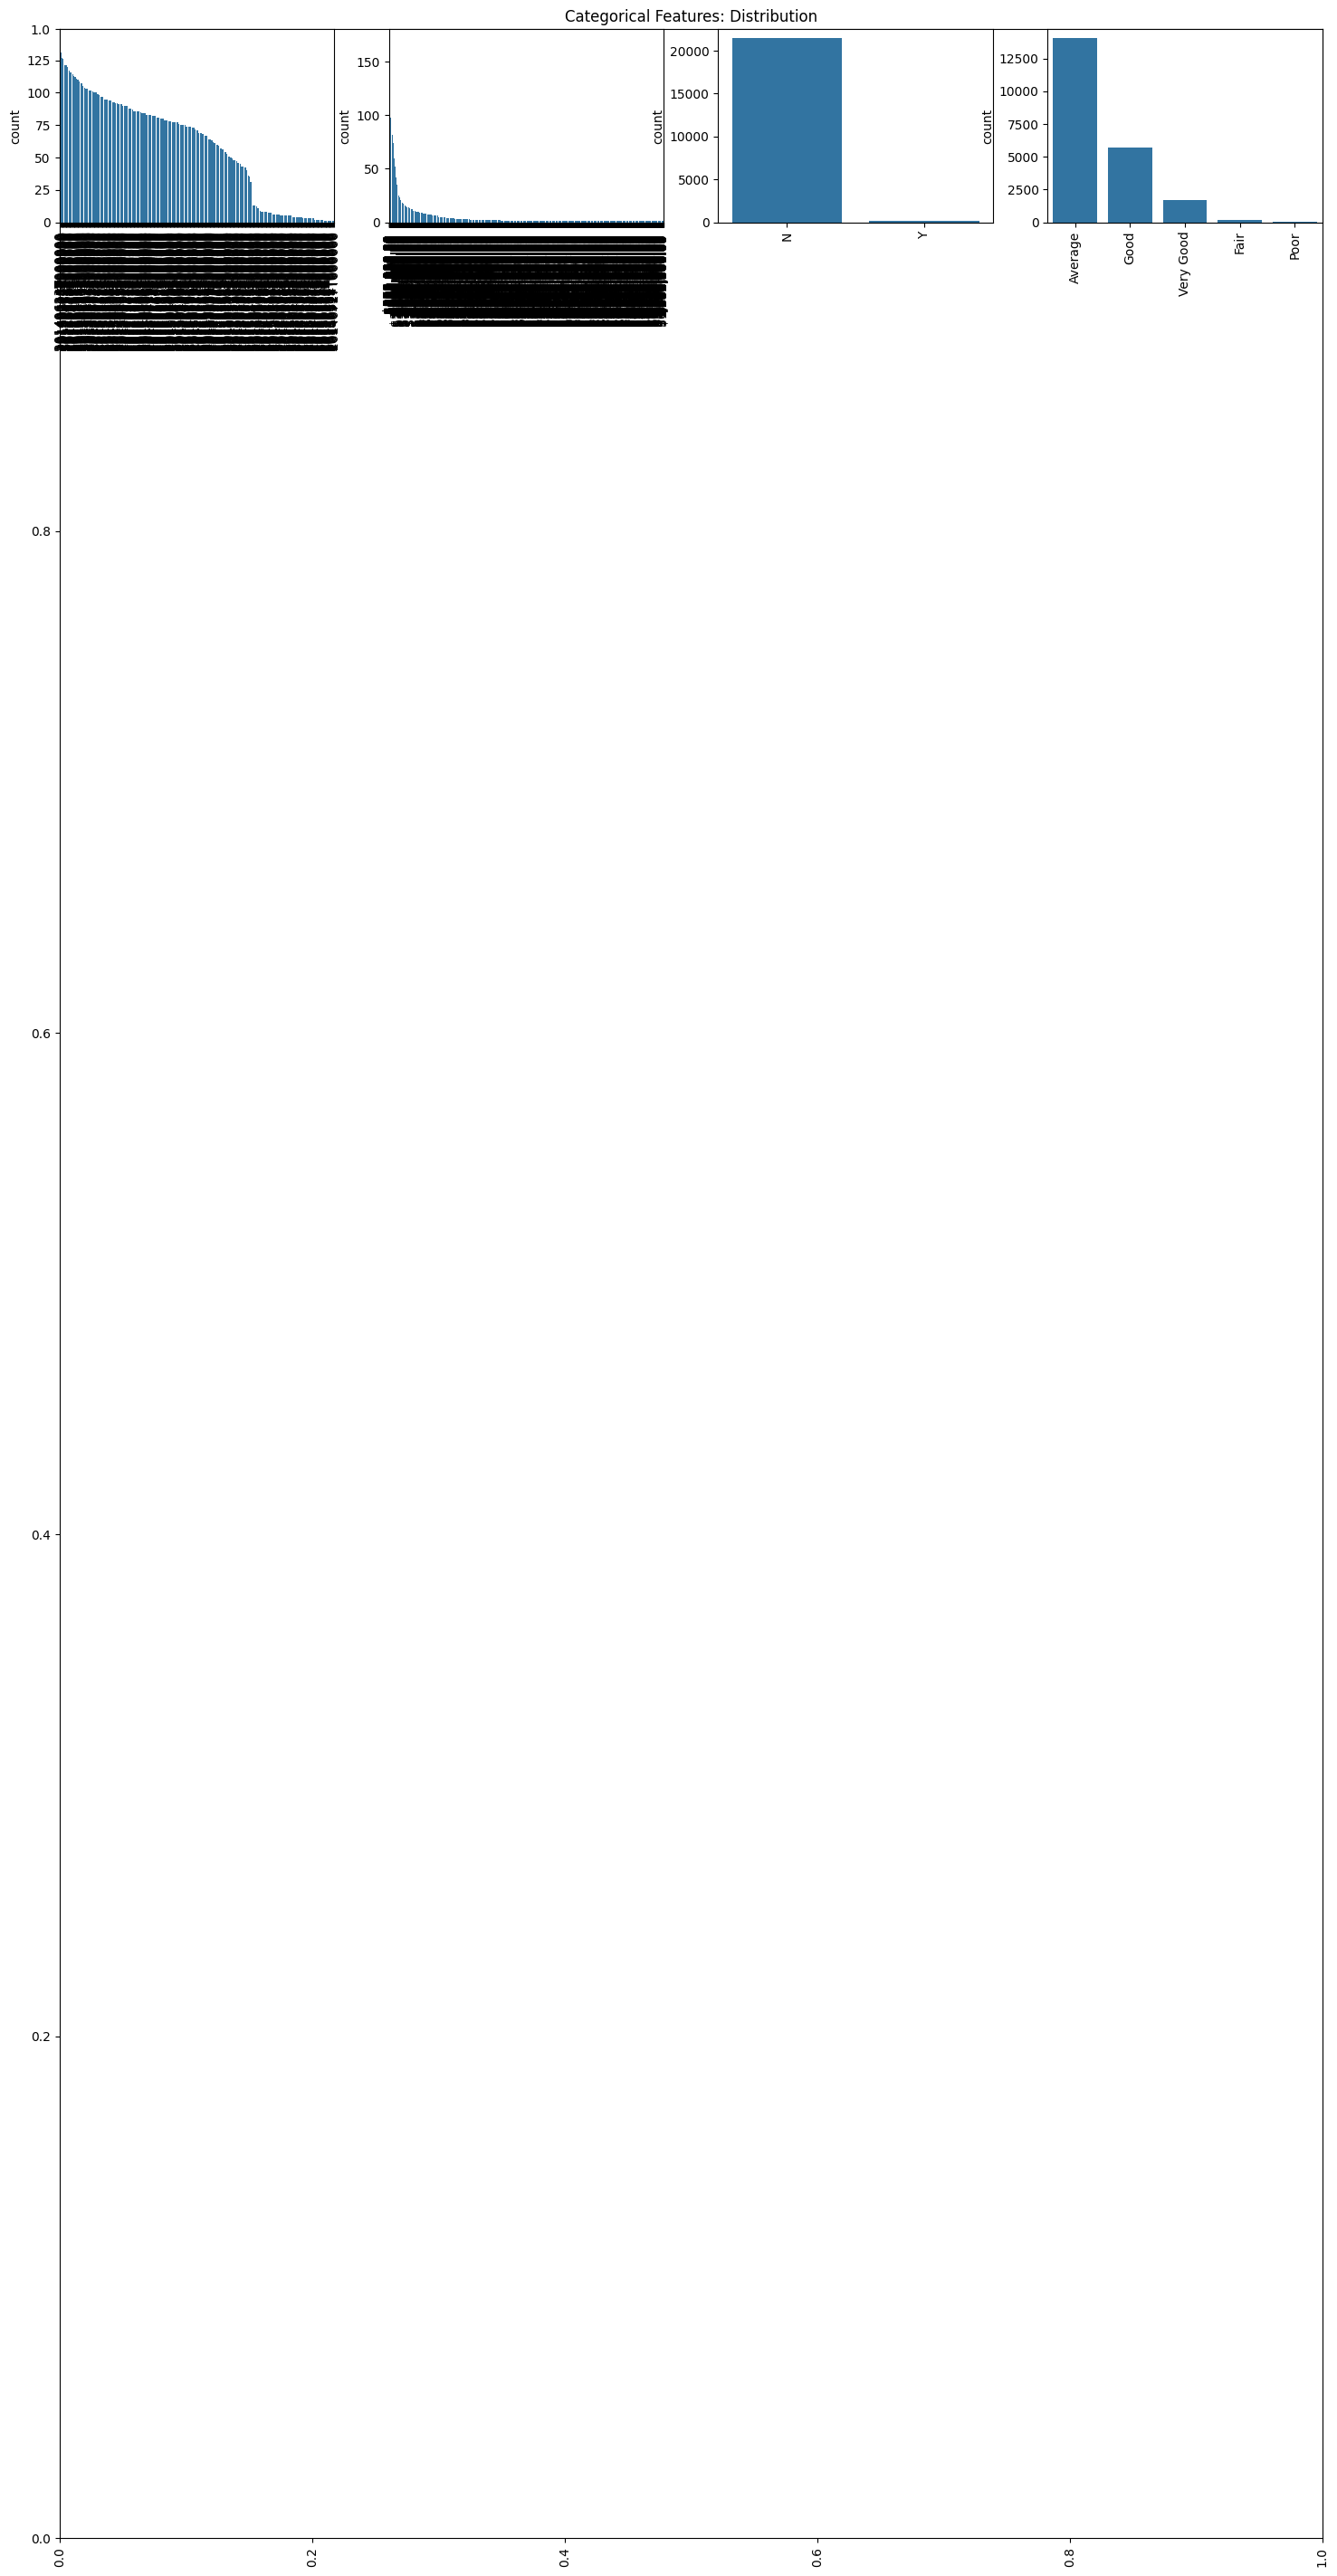

In [11]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [16]:
#Data cleaning
dataset['id']

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21608     263000018
21609    6600060120
21610    1523300141
21611     291310100
21612    1523300157
Name: id, Length: 21613, dtype: int64

In [28]:
dataset.drop(['id'],
             axis=1,
             inplace=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,"$221,900.00",3,1.00,1180,5650,1.0,N,0,Average,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,"$538,000.00",3,2.25,2570,7242,2.0,N,0,Average,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,"$180,000.00",2,1.00,770,10000,1.0,N,0,Average,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,"$604,000.00",4,3.00,1960,5000,1.0,N,0,Very Good,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,"$510,000.00",3,2.00,1680,8080,1.0,N,0,Average,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,"$360,000.00",3,2.50,1530,1131,3.0,N,0,Average,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,"$400,000.00",4,2.50,2310,5813,2.0,N,0,Average,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,"$402,101.00",2,0.75,1020,1350,2.0,N,0,Average,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,"$400,000.00",3,2.50,1600,2388,2.0,N,0,Average,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [19]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
columns  =  ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors']

In [24]:
for cols in columns:
    dataset[cols] = dataset[cols].fillna(dataset[cols].median())

In [25]:
new_dataset = dataset.dropna()

In [26]:
new_dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# things to do:
## 1. change the dataset columns into numeric value
## 2. if it is in string then apply one hot encoding method
## 3. import the supervised learning algorithm model from pandas
## 4. split it into 80, 20 i.e. 80 is training data and 20 is testing data
## 5. train the model 
## 6. visualize the accuracy and perform optimization according to the accuracy